In [1]:
import pickle
import numpy as np
import csv
import random
from pathlib import Path
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def byte2str(word):
    str(word, encoding='utf-8')
    return bytes.decode(word)

In [3]:
train_dict = unpickle('/home/tony/datasets/cifar-100-python/train')
test_dict = unpickle('/home/tony/datasets/cifar-100-python/test')
meta_dict = unpickle('/home/tony/datasets/cifar-100-python/meta')

# preprocess data

In [4]:
train_data = train_dict[b'data']
train_labels = train_dict[b'fine_labels']
labels_name = meta_dict[b'fine_label_names']
train_data_dir = Path('/home/tony/datasets/CIFAR_preprocessed/train/')

if not train_data_dir.is_dir():
    train_data_dir.mkdir(parents=True)
    
for b_name in labels_name:
    class_name = Path(byte2str(b_name))
    class_dir = train_data_dir / class_name
    if not class_dir.is_dir():
        class_dir.mkdir(parents=True)

for i in tqdm(range(train_data.shape[0])):
    r = train_data[i][:1024]
    g = train_data[i][1024:2048]
    b = train_data[i][2048:3072]
    r = r.reshape((32, 32))
    g = g.reshape((32, 32))
    b = b.reshape((32, 32))
    img = np.stack((r, g, b), axis=2)
    label = train_labels[i]
    class_name = Path(byte2str(labels_name[label] ))
    np.save(train_data_dir / class_name / f'image_{i}.npy', img)

In [ ]:
test_data = test_dict[b'data']
test_labels = test_dict[b'fine_labels']
labels_name = meta_dict[b'fine_label_names']
test_data_dir = Path('/home/tony/datasets/CIFAR_preprocessed/test/')

if not test_data_dir.is_dir():
    test_data_dir.mkdir(parents=True)
    
for b_name in labels_name:
    class_name = Path(byte2str(b_name))
    class_dir = test_data_dir / class_name
    if not class_dir.is_dir():
        class_dir.mkdir(parents=True)

for i in tqdm(range(test_data.shape[0])):
    r = test_data[i][:1024]
    g = test_data[i][1024:2048]
    b = test_data[i][2048:3072]
    r = r.reshape((32, 32))
    g = g.reshape((32, 32))
    b = b.reshape((32, 32))
    img = np.stack((r, g, b), axis=2)
    label = test_labels[i]
    class_name = Path(byte2str(labels_name[label] ))
    np.save(test_data_dir / class_name / f'image_{i}.npy', img)

# make csv

In [10]:
RANDOM_SEED = 601985
VAL_RATE = 0.1

split_path = Path('/home/tony/datasets/CIFAR_preprocessed/train')
classes_path = [_dir for _dir in split_path.iterdir() if _dir.is_dir()] 
for _dir in classes_path:
    csv_path = str(_dir / Path('CIFAR_split.csv'))
    with open(csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        data_list = sorted(list(_dir.glob('*.npy')))
        val_len = int(len(data_list) * 0.1)
        
        random.seed(RANDOM_SEED)
        random.shuffle(data_list)
        train_list = data_list[val_len:]
        val_list = data_list[:val_len]

        for idx, path in enumerate(train_list):
            writer.writerow([str(path), 'Training'])
        for idx, path in enumerate(val_list):
            writer.writerow([str(path), 'Validation'])

In [39]:
a = 5
b = np.asarray([a])
b = np.expand_dims(b, 1)
b.shape

(1, 1)

In [36]:
b = np.array([5])
b.shape

(1,)

In [32]:
with open(csv_path, 'r', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for _path, _type in rows:
        print(f'{_path}, {_type}')

/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_37857.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_15263.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_49899.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_156.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_11797.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_21997.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_12386.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_49887.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_27640.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_15132.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_28001.npy, Training
/home/tony/datasets/CIFAR_preprocessed/train/keyboard/image_42970.npy, Training
/home/tony/datasets/CIFAR_preprocessed/tra

In [21]:
class_dirs = [_dir for _dir in train_data_dir.iterdir() if _dir.is_dir()]
for dir_path in class_dirs:
    if len(list(dir_path.glob('image*.npy'))) != 450:
        print(dir_path)

In [40]:
class_dirs = [_dir for _dir in test_data_dir.iterdir() if _dir.is_dir()]
for dir_path in class_dirs:
    if len(list(dir_path.glob('image*.npy'))) != 100:
        print(dir_path)

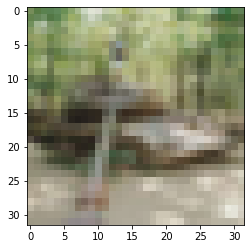

In [4]:
### check output
class_name = 'tank'
location = Path('/home/tony/datasets/CIFAR_preprocessed/train/') / Path(class_name)
idx = random.randint(0, 499)
img_path = list(location.glob('image*.npy'))[idx]
img = np.load(img_path)
plt.imshow(img)

In [7]:
img = np.load(img_path)
isinstance(img, np.ndarray)

True

In [5]:
a = [1, 2, 3]
b = [4, 5, 6]
a*b

TypeError: can't multiply sequence by non-int of type 'list'

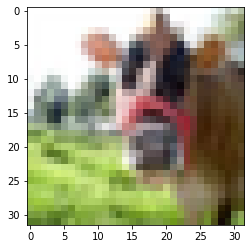

In [11]:
i = 0
r = train_data[i][:1024]
g = train_data[i][1024:2048]
b = train_data[i][2048:3072]
r = r.reshape((32, 32))
g = g.reshape((32, 32))
b = b.reshape((32, 32))
img = np.stack((r, g, b), axis=2)
plt.imshow(img)